# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [39]:
from random import randint 
from math import atan2

def get_bottom_point(points):
    min_index = 0
    n = len(points)
    for i in range(0, n):
        if points[i][1] < points[min_index][1] \
                or (points[i][1] == points[min_index][1] and points[i][0] < points[min_index][0]):
            min_index = i
    return min_index

def polar_angle(p0, p1):
   y = p0[1]-p1[1]
   x = p0[0]-p1[0]
   return atan2(y, x)

def distance(p0, p1):
   y = p0[1] - p1[1]
   x = p0[0] - p1[0]
   return y**2 + x**2

def quicksort(points, anchor):
   if len(points) <= 1: 
       return points
   smaller, equal, larger = [],[],[]
   pivot = polar_angle(points[randint(0,len(points)-1)], anchor) 
   for point in points:
      angle = polar_angle(point, anchor) 
      if angle < pivot:  
          smaller.append(point)
      elif angle == pivot: 
          equal.append(point)
      else: 
          larger.append(point)
   return quicksort(smaller, anchor) \
         + sorted(equal, key = lambda x: distance(x,anchor)) \
         + quicksort(larger, anchor)

def cross_product(v1, v2):
    return v1[0]*v2[1] - v1[1]*v2[0]

def grahamscan(inputSet):
    bottom_index = get_bottom_point(inputSet)
    bottom_point = inputSet.pop(bottom_index)
    sorted_points = quicksort(inputSet, bottom_point)
 
    m = len(sorted_points)
    if m < 2:
        return
 
    outputSet = []
    outputSet.append(bottom_point)
    outputSet.append(sorted_points[0])
    outputSet.append(sorted_points[1])
 
    for i in range(2, m):
        length = len(outputSet)
        top = outputSet[length-1]
        next_top = outputSet[length-2]
        v1 = [sorted_points[i][0]-next_top[0], sorted_points[i][1]-next_top[1]]
        v2 = [top[0]-next_top[0], top[1]-next_top[1]]
 
        while cross_product(v1, v2) >= 0:
            outputSet.pop()
            length = len(outputSet)
            top = outputSet[length-1]
            next_top = outputSet[length-2]
            v1 = [sorted_points[i][0] - next_top[0], sorted_points[i][1] - next_top[1]]
            v2 = [top[0] - next_top[0], top[1] - next_top[1]]
 
        outputSet.append(sorted_points[i])

    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [40]:
import random

#code for random data generation
def random_data(N):
    inputlista = [[random.randint(0, 32767) for j in range(1, 3)] for i in range(N)] #get N pairs random points
    return inputlista 

#code for worst case data generation
#The term with the highest degree in the polynomial is the sorted algorithm(O(nlogn)), the worst case scenario iterates all points but the complexity is still O(nlogn)



Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [41]:
import timeit

#test code
# random data time
timelista = []
# for N in [100,500, 1000, 5000, 10000, 15000,20000]:
for N in [100,500,1000,5000,10000,15000,20000]:
    inputlista = random_data(N)
    t = timeit.timeit("grahamscan(inputSet=inputlista)","from __main__ import grahamscan, inputlista", number=100)
    timelista.append(t)


IndexError: pop from empty list

In [42]:
print(timelista)
print(timelistb)                                                                                                             

[]


NameError: name 'timelistb' is not defined

*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has  been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

10
13
17
20
26
27
25


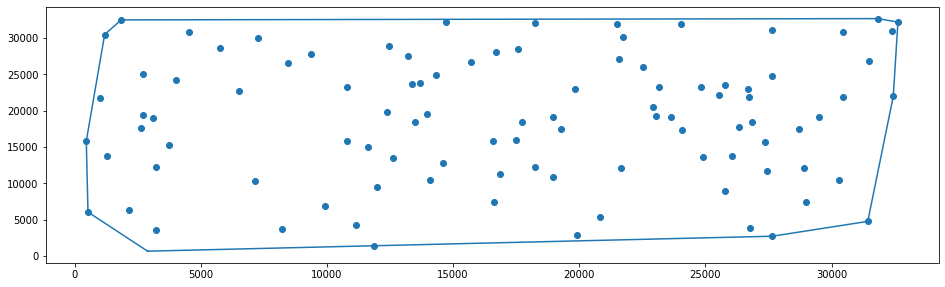

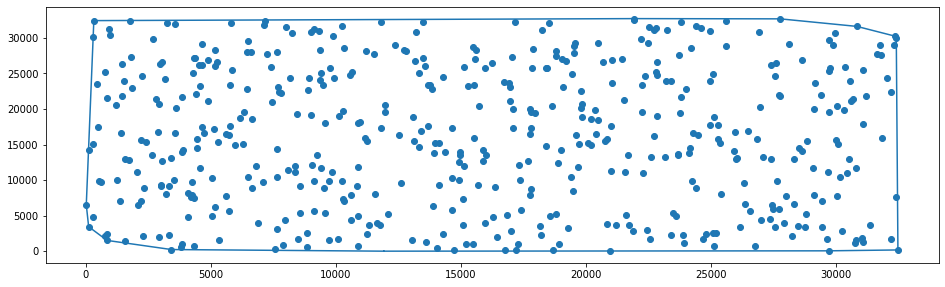

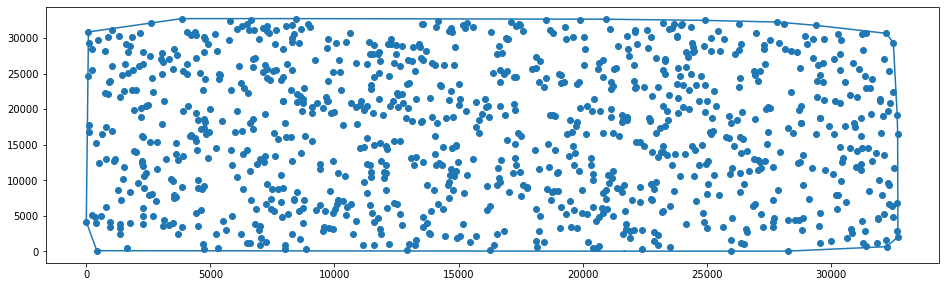

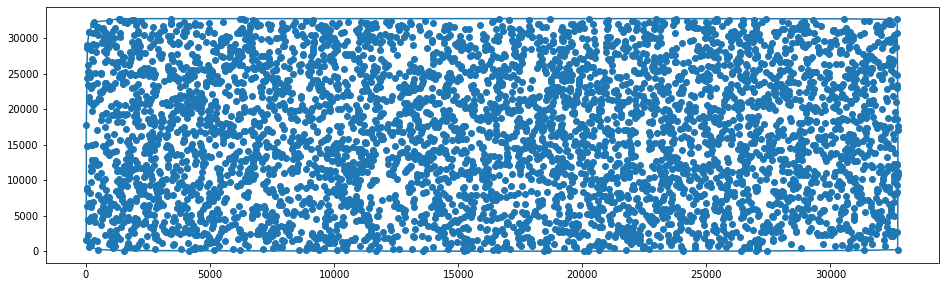

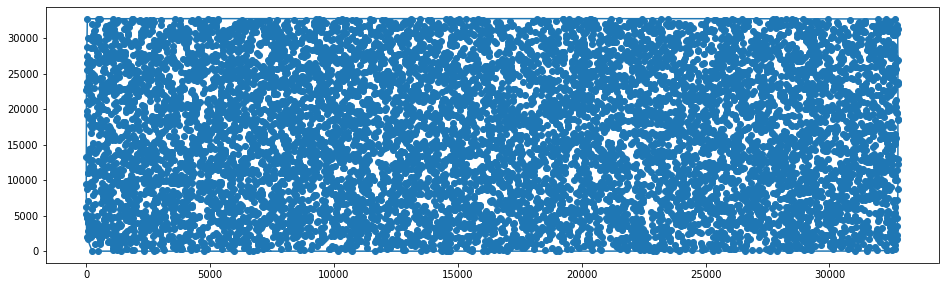

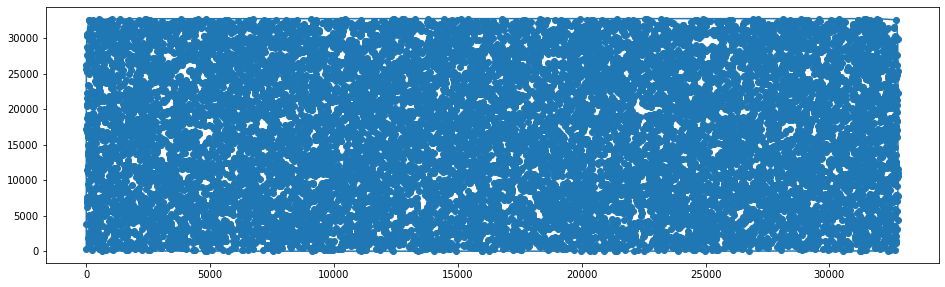

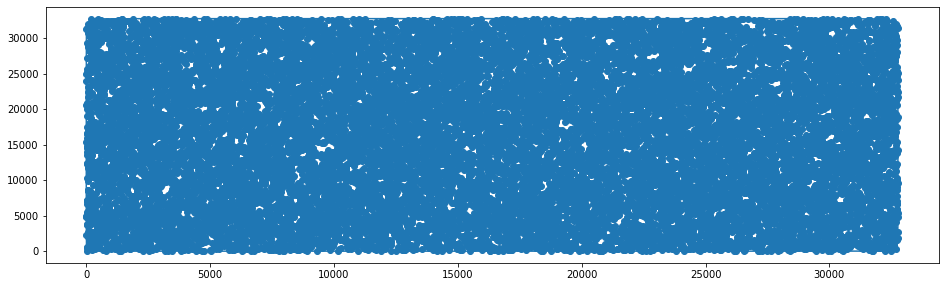

In [43]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

for N in [100,500, 1000,5000,10000,15000,20000]:
    inputSet = random_data(N)
    outputSet = grahamscan(inputSet)

    i=1
    plt.figure(figsize=(16,16))
    plt.subplot(3,1,i)
    print(len(outputSet))


    #first do a scatter plot of the inputSet
    input_xs, input_ys = zip(*inputSet)
    plt.scatter(input_xs, input_ys)

    #then do a polygon plot of the computed covex hull
    outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
    output_xs, output_ys = zip(*outputSet) 
    plt.plot(output_xs, output_ys) 

plt.show() 

In [44]:
import matplotlib.pyplot as plt
x = [100,500,1000,5000,10000,15000,20000]
plt.figure()
plt.scatter(x,timelista)
plt.show()

ValueError: x and y must be the same size

In [ ]:
import matplotlib.pyplot as plt
x = [100,500,1000,5000,10000,15000,20000]
plt.figure()
plt.scatter(x,timelistb)
plt.show()